# Searching Introduction
> Introduction to the binary search algorithm, it's uses, advantages, and disadvantages
- toc: true 
- badges: true
- comments: true

## What is searching?
In certain computer programs and applications, one might find the need to locate and retrieve a data value and/or it's index. Searching algorithms could be done in either intervals or sequences, and certain algorithms could be more efficient than others, with benefits and drawbacks to each.



## The Naive Approach
The most intuitively obvious solution to the searching problem is to sequentialy check each successful value in the data structure until either a matching value is found, or the entire structure has been transversed. This thought process could be explained graphically in this example



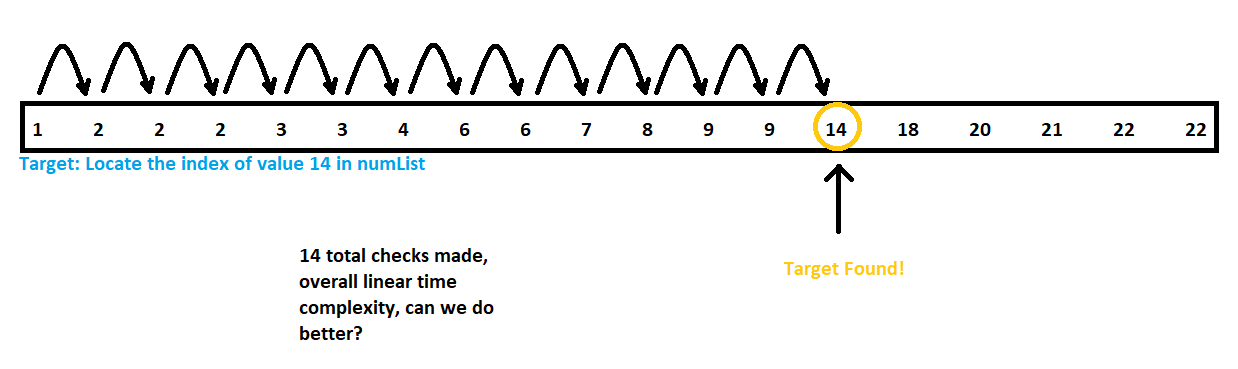

In [98]:
#hide_input
from IPython import display
display.Image("../images/SequentialSearch.png")

This algorithm could also be expressed in code, as shown below.

In [99]:
def sequentialSearch(arr, target):
    N = len(arr)                     # Declare N as length of array
    for i in range(N):               # Iterate over the list
        if arr[i] == target:         # Check for match
            return i                 # Match found, return index and end function call
    return -1                        # Element not found

### Sequential Search - Larger Inputs
Although for selection sort is seemingly fast for smaller inputs, it is clear that it cannot keep up with increasing input sizes. Because sequential search checks every value of the given array, the algorithm's overall runtime increases "linearly" with the input size.

i.e. Pretend that one check takes one second, and that we are searching for the last element in an array. If the array length is 4, it would take 4 seconds to find the last element, whereas if the array length is 86400 indices long, it would take a whole day to find the element.  

Hence, although selection sort is known for its simplicity, it is unfeasible for large inputs

Below, we have created three **sorted** lists of length 100,1000000,100000000.

In [100]:
import time
arr1 = [i for i in range(100)]
arr2 = [i for i in range(1000000)]
arr3 = [i for i in range(100000000)]

To analyze the sequential search algorithm, we will check for the worst case scenario, where runtime is maximized. This is because when measuring the efficiency of our algorithm, we want to be able to guarantee an upper limit or set amount of time for our program to finish running. To do this, we will attempt to search for the last element in the array

In [101]:
## arr1
print("length of list: ", len(arr1))
s = time.time()
print("Index: ", sequentialSearch(arr1,99))
e = time.time()
print('Execution time:', (e-s)*1000, 'ms')

length of list:  100
Index:  99
Execution time: 0.05602836608886719 ms


In [102]:
## arr2
print("length of list: ", len(arr2))
s = time.time()
print("Index: ", sequentialSearch(arr2,999999))
e = time.time()
print('Execution time:', (e-s)*1000, 'ms')

length of list:  1000000
Index:  999999
Execution time: 58.67457389831543 ms


In [103]:
## arr3
print("length of list: ", len(arr3))
s = time.time()
print("Index: ", sequentialSearch(arr3,99999999))
e = time.time()
print('Execution time:', (e-s)*1000, 'ms')

length of list:  100000000
Index:  99999999
Execution time: 5162.384986877441 ms


As you can see, as the input list grows larger and larger, the overall runtime of the program increases linearly as well, resulting in a lower scalability for the sequential search algorithm.

## Binary Search
Binary search is an efficient way to iterate through a ***SORTED*** list to find a requested value. This is done through checking the middle value of a list and checking if the requested value is greater than or less than the middle value. You can start to see why the requested list must be sorted. If the list is not sorted, this logic is flawed, and the binary search algorithm will no longer work.

Unlike the sequential search method, binary search doesn't check for each successive element until a match is found. In every iteration the algorithm is making a binary decision; if the selected element is larger or smaller than the target.

How exactly does this work? Lets look at these amazing ms paint drawings:

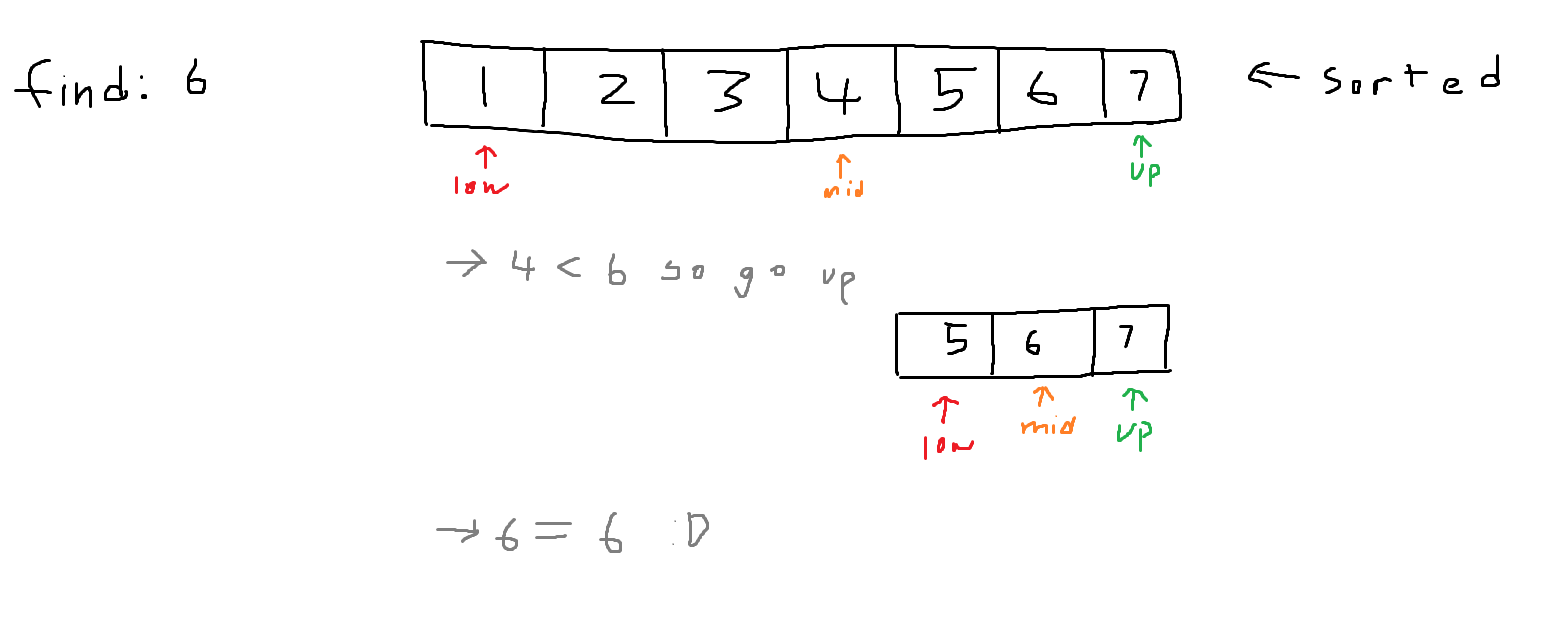

In [104]:
#hide_input
display.Image("../images/BinarySearch1.png")

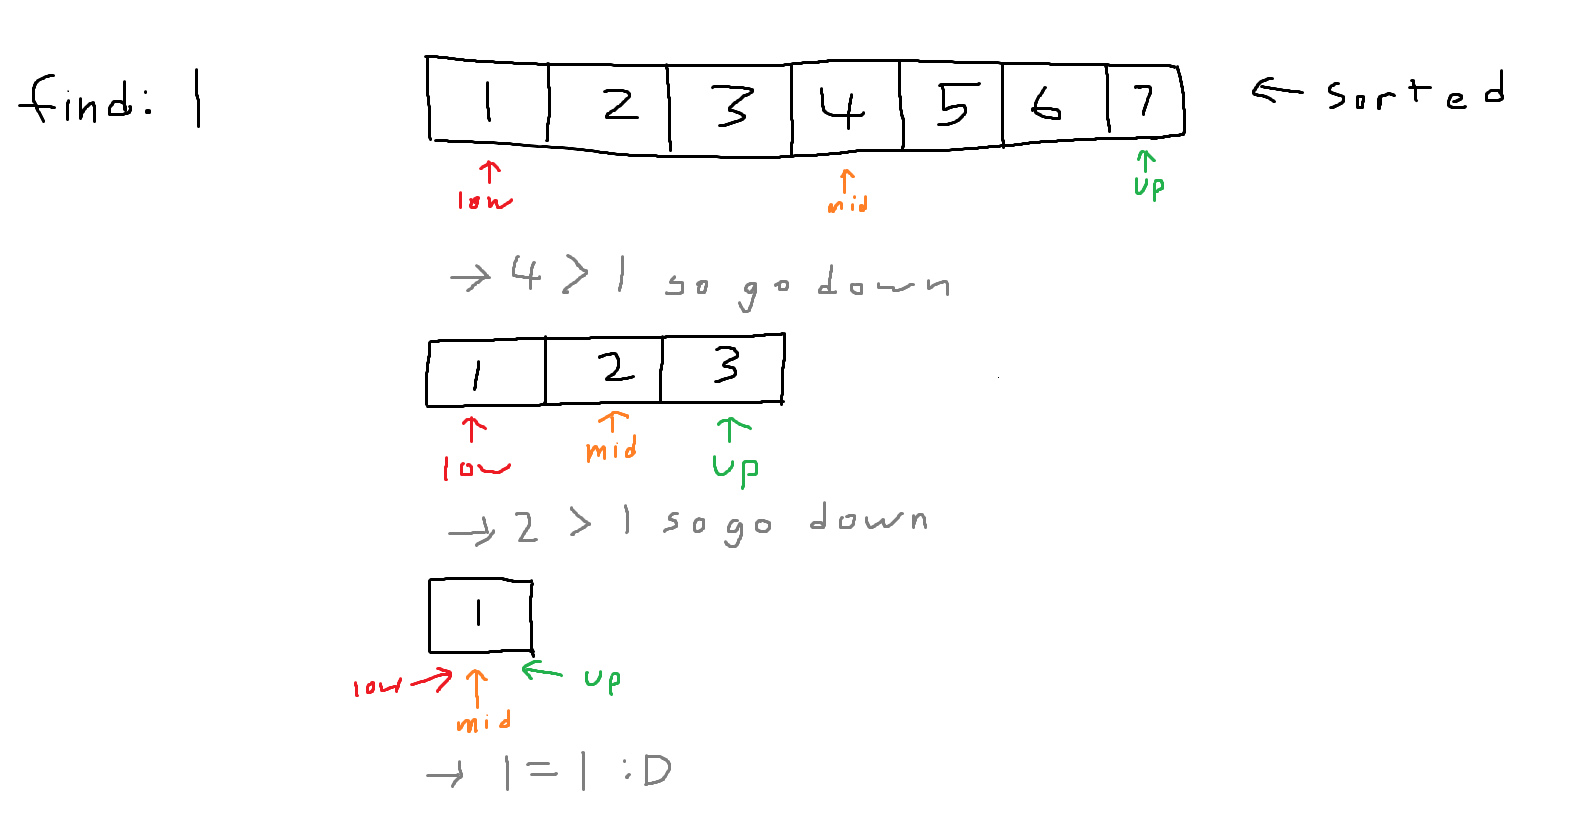

In [105]:
#hide_input
display.Image("../images/BinarySearch2.png")

*i was too lazy to make a third so ur gonna have to live with 2 :)*

This algorithm is extremely efficient as the maximum number of cycles in binary search is equal to log base 2 of the closest, next power of two, to length of list. 
> If the array is 8 items long, the maximum possible cycles would be **3** (log base 2 of 8 is 3)
>
> If the array is 7 items long, the maximum possible cycles would **STILL** be **3** as the closest power of 2 to 7 is 8. 
> 
> If the array is 9 items long, the maximum possible cycles **INCREASES** to **4**, as the closest, next power of two, is 16.


In [106]:
def binarySearch(array, target):            # Parameters: array is the given array and target is what we are looking for
    low = 0                                 # the starting lower bound
    high = len(array)-1                     # the starting upper bound
    while high >= low:                      # we will keep running until we run out of possible subarrays...
        mid = (high + low) // 2             #   define the middle of the list to be the item at the index of the average of the lower and upper bound
        if array[mid] == target:            #   if item is in the middle of the list... we found what we are looking for!
            return mid                      #       therefore, we return the index of where we found the item.
        elif array[mid] > target:           #   if item is less than the middle of the list, this must mean that the item is on the lower half of the list
            high = mid-1                    #       therefore, we set the upper bound of the search to be the last item of the lower half
        else:                               #   if item is neither less than or equal to the middle of the list, this must mean that the item is on the upper half of the list
            low = mid+1                     #       therefore, we set the lower bound of the search to be the first item of the upper half
                                            # if nothing is returned by the time the while loop ends, that means item MUST be missing from list
    return False                            #   therefore we tell the user that the requested item was not found


Likewise, we can also take a recursive approach to this problem, note the similarities

In [ ]:
def BinarySearchRecursion(arr, target, lo, hi):
    if lo > hi:
        return False
    mid = (lo+hi)//2
    if arr[mid] == target:
        return mid
    elif arr[mid] > target:
        return BinarySearchRecursion(arr, target, lo, mid-1)
    elif arr[mid] < target:
        return BinarySearchRecursion(arr, target, mid+1, hi)

Now, let's compare the runtime with the same lists we tried with the sequential search algorithm.

In [107]:
## arr1
print("length of list: ", len(arr1))
s = time.time()
print("Index: ", binarySearch(arr1,99))
e = time.time()
print('Execution time:', (e-s)*1000, 'ms')

length of list:  100
Index:  99
Execution time: 0.05507469177246094 ms


In [108]:
## arr2
print("length of list: ", len(arr2))
s = time.time()
print("Index: ", binarySearch(arr2,999999))
e = time.time()
print('Execution time:', (e-s)*1000, 'ms')

length of list:  1000000
Index:  999999
Execution time: 0.17070770263671875 ms


In [109]:
## arr3
print("length of list: ", len(arr3))
s = time.time()
print("Index: ", binarySearch(arr3,99999999))
e = time.time()
print('Execution time:', (e-s)*1000, 'ms')

length of list:  100000000
Index:  99999999
Execution time: 0.06628036499023438 ms


In [110]:
## Case: Element not found 
arr4 = [1,4,5,8,10,13,145,1938]
print("Index: ", binarySearch(arr4,17))

Index:  False


## Challenges and Homework

You have one homework problem.
  
Yes just one.
  
Don't get excited though.

**Problem:** Given a specific integer **N**, return the square root of **N** (**R**) if **N** is a perfect square, otherwise, return the square root of **N** rounded down to the nearest integer

**Input:** **N** (Integer)

**Output:** **R** (Integer)
  
**Constraints:** Do not use any built-in math operations such as `sqrt(x)` or `x**(0.5)`, Try complete the problem in logarithmic time. 
  
**Hint 1:** Maybe you can use Binary Search to try and reduce the number of checks you have to perform?  
  
**Hint 2:** Is there a mathematical pattern amongst numbers and their square roots that could help you reduce the number of searches or iterations you must execute? Is there some value or rule you can set before applying binary search to narrow the range of possible values?

Run the very last code segment below to load test cases and submission function

In [3]:
def sqrt(N):
    # Write your code here
    return None

In [4]:
from math import sqrt as sq
test_cases = [0,1,4,85248289,22297284,18939904,91107025,69122596,9721924,37810201,1893294144,8722812816,644398225]
answers = [int(sq(x)) for x in test_cases]

def checkValid():
    for i in range(len(test_cases)):
        if sqrt(test_cases[i]) == answers[i]:
            print("Check number {} passed".format(i+1))
        else:
            print("Check number {} failed".format(i+1))

checkValid()

Check number 1 failed
Check number 2 failed
Check number 3 failed
Check number 4 failed
Check number 5 failed
Check number 6 failed
Check number 7 failed
Check number 8 failed
Check number 9 failed
Check number 10 failed
Check number 11 failed
Check number 12 failed
Check number 13 failed
